# Lecture notes from second week
Programming for the Behavioral Sciences

Last week, basic concepts in Python were introducted. This week, functions will be introduced. A function is a piece of code that helps you to organize, re-use, and share your code. We have already used many function in course, for instance, print() and range(). More information and examples of functions can be found here:
https://www.tutorialspoint.com/python/python_functions.htm

Let start with an example. This time, enter the code in the 'editor' window in Spyder, and press the green button shaped like a triangle to run your code. Any output of your code is shown in the iPython console.

### Functions
Example: Assume that you have a long text, and you want to count the number of words with two letters. Further assume that this is a really important part of your research; you do it every day from many large bodies of text. This is how it can be done.

In [16]:
# This is a sentence
sentence = 'This is a rather long sentence. I want to find the number of two word letters'

# This is the code you need to find the number of words of length 2 (e.g., is, to, and of)
words = sentence.split(' ') # Split the sentence string into a list of words, the space between the 
                            # quotations marks means that the sentence is 
                            # split at every space character.
                            # Using sentence.split(',') would instead divide the sentence at commas.
print(words)

['This', 'is', 'a', 'rather', 'long', 'sentence.', 'I', 'want', 'to', 'find', 'the', 'number', 'of', 'two', 'word', 'letters']


In [17]:
# Not count the number of words of length 2
nWords_len2 = 0           # We need this variable for word counting
for word in words:        # Go through all the words in the list, one by one
    if len(word) == 2:    # If the length of the word is equal to 2
        nWords_len2 += 1  # This means increasing the value of nWords_len2 by +1. 
                          # Same as nWords_len2 = nWords_len2 + 1

print(nWords_len2)        # There are three words with two letters (is, to, of)

3


Imagine this is a task we do every day, wouldn't it be nice to have a way to perform this without re-typing all this code every time? Something like:

Now you can easily and quickly repeat the task. 
find_len2_words() is in fact a function. Let's look at how it is defined.

In [18]:
def find_len2_words(input_text):
    '''Returns the number of words containing two letters''' # This is called a doc-string
    nWords = 0
    for word in words:
        if len(word) == 2:
            nWords += 1
            
    return nWords   

The function (and all functions) starts by def, followed by the name of the function and the input variables within parenthesis. In this case, there is one input variables, but there could be two or more.

The next line contains a so-called 'doc [documentation] string', which tells the user what the functions does.

At the end of the funtion, there is a 'return' argument. This is what the function outputs or return back. One could see a function as a 'black box', which provided an input returns an output. Many times, the programmer does not see the content of the box (the function), but can use it anyways. This is the case with the print()-function, for instance; we have used it many times, but we don't know what's 'under the hood'.

![title](img/function_black_box.png)

Now let's repeat the task to find the number of two letter words from 'sentence'-string, but now by using the function.

In [19]:
nWords_with_two_letters = find_len2_words(sentence)
print(nWords_with_two_letters)

3


We completed the task in just one line of code and got the same result! The function can easily be re-used and even shared with collegues in your community.

### Function arguments
There may also be an interest in finding the number of words with other lengths, e.g., three or four letters. Let see how the above function can be generalized.

In [20]:
def find_lenn_words(input_text, n=2):
    '''Returns the number of words containing n letters. 
    If no input n is given, n = 2.
    '''
    words = input_text.split(' ')
    nWords = 0
    for word in words:
        if len(word) == n:
            nWords += 1
            
    return nWords  

In [21]:
# Test the function
my_input_text = sentence                        # borrow the sentence defined above as input
nWords  = find_lenn_words(my_input_text)        # What happens if I don't specify the length n?
nWords2 = find_lenn_words(my_input_text, n = 2) 
nWords6 = find_lenn_words(my_input_text, n = 6) 

# Print the results
print(nWords, nWords2, nWords6)


3 3 2


### Local and global variables
Some variable are local to the function, i.e., they exist and can only be used inside that function 'box'. Global variables can be used both inside and outside the funtion.

In [22]:
variable_definded_outside_function = 12


def myfun1(a, b):
    ''' Adds two number and returns the result'''
    c = a + b
    
    # Test to print a variable defined outside of the function
    print(variable_definded_outside_function)   # This works! The function can 'see' 
                                                # variables defined outside of the function
    
    return c

In [23]:
# Try the function
a1 = 5
a2 = 4
myres = myfun1(a1, a2)
print(myres)

12
9


What if I try to print the local variable 'a' outside of the function?

In [24]:
print(a) # a (and b and c) only exists inside the function (local scope), so I can print it here.

NameError: name 'a' is not defined

Consider the code below and try to understand why the output looks the way it does. 

In [10]:
x = 5  # Define a global variable x = 5

def return_global():
    '''Returns global variable'''
    return x

def modify_global():
    '''Modifies global variable. '''
    # A global variable can only be modified if it is defined as global within the function
    global x 
    x = 'global'
    return x

def create_local():
    '''Creates a local variable x'''
    # The local variable 'x' knows nothing about the global variable 'x'.
    x = 'local'
    return x

# Test the functions
y0 = return_global() # Returns 5
y1 = modify_global() # Returns 'global'
y2 = create_local()  # Returns 'local'
y3 = return_global() # Now returns 'global', why?

print(y0, y1, y2, y3)

(5, 'global', 'local', 'global')


### Introduction to Lab 2
Implementing an event detector for eye tracking data, which consist of eye movements recorded at 1000 Hz from a person reading a text. An event detector finds prototypical patterns in the data known as fixations (when the eye is still) and saccades (when the eye moves fast). We will use the velocity of the eye movements to find the number and durations of the fixations.

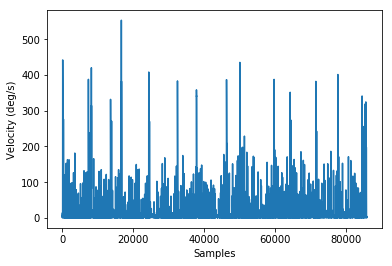

In [8]:
import matplotlib.pyplot as plt # a library for plotting
import pandas as pd # a library for reading csv files
import numpy as np # A library to work with numbers

# Read data from a csv file and plot them. Data are in a numpy array.
# The data are stored in a folder 'img' in the 
# same directory as the script containing this code.
eye_velocity = np.array(pd.read_csv("img/eye_velocity.csv")).flatten()

# Plot the data and annotate the plot
plt.plot(eye_velocity) 
plt.xlabel('Samples')
plt.ylabel('Velocity (deg/s)')
plt.show()  

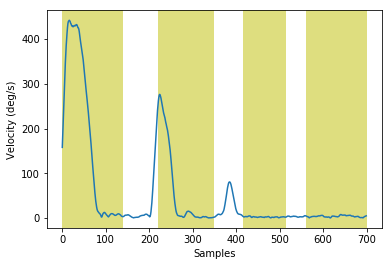

In [9]:
# Zoom in on a smaller part of the data
eye_velocity_short = eye_velocity[100:800]
plt.plot(eye_velocity_short) 
plt.xlabel('Samples')
plt.ylabel('Velocity (deg/s)')

# Indicate fixations with interval shaded
plt.axvspan(0, 140, color='y', alpha=0.5, lw=0)
plt.axvspan(220, 350, color='y', alpha=0.5, lw=0)
plt.axvspan(415, 515, color='y', alpha=0.5, lw=0)
plt.axvspan(560, 700, color='y', alpha=0.5, lw=0)

# Show the results
plt.show() 


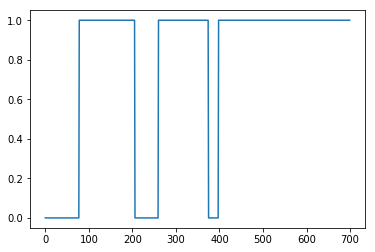

In [10]:
# Fixations are located where velocity < 30
threshold = 30
fixation_samples = (eye_velocity_short < threshold) * 1 # *1 to convert True / False to 1 / 0

plt.plot(fixation_samples)
plt.show()

Now we have simplified the problem. Let's find the onsets (positions where the plot changes from 0->1) and offsets (positions where the plot changes from 1->0) of the fixations.


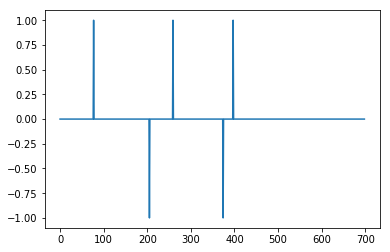

In [11]:
import numpy as np                  # Now we need numpy, so let's import it
plt.plot(np.diff(fixation_samples)) # diff means to the the difference between two consecutive 
                                    # samples i - (i-1). [0, 1, 0] -> [1, -1]
plt.show()

One problem remains: the first fixation onset and the last fixation offset were not found. We can solve this as follows.

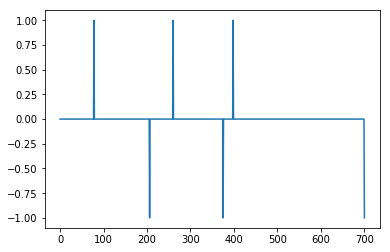

In [12]:
fixation_samples_0 = np.hstack((0, fixation_samples, 0))
plt.plot(np.diff(fixation_samples_0)) # diff means to the the difference between two consecutive 
                                    # samples i - (i-1). [0, 1, 0] -> [1, -1]
plt.show()

Now the problem is made even simpler. To find the number of fixation, we need to find the number of 1s (representing the onsets) or the number of -1s (representing the offsets). The duration of a fixation can be computed by taking the difference between offset and onset locations. To find out where in an array something happens, the 'where' function in numpy can be used. Note that the output is a tuple!

In [13]:
# Find the fixation onsets
fix_onsets = np.where(np.diff(fixation_samples_0) == 1)
print(fix_onsets)

(array([ 78, 260, 398], dtype=int64),)


Use the knowledge acquired so far to complete this weeks assignment!